In [6]:
import pathlib
data_dir = r"C:\Users\crb89\Desktop\Rice_Type_Detection\Data\Rice_Image_Dataset" # Datasets path
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/crb89/Desktop/Rice_Type_Detection/Data/Rice_Image_Dataset')

In [7]:
import sys
print(sys.executable)


d:\anaconda\envs\rice_env\python.exe


In [8]:

arborio = list (data_dir.glob('Arborio/*'))[ :600]
basmati = list(data_dir.glob('Basmati/*'))[ :600]
ipsala = list(data_dir.glob('Ipsala/*'))[:600]
jasmine = list(data_dir.glob('Jasmine/*'))[ :600]
karacadag = list(data_dir.glob('Karacadag/*'))[ :600]


In [9]:

# Importing necessary libraries
# Building deep learning models
import tensorflow as tf
from tensorflow import keras
# For accessing pre-trained models
import tensorflow_hub as hub
# For separating train and test sets
from sklearn.model_selection import train_test_split
# For visualizations
import matplotlib. pyplot as plt
import matplotlib.image as img


import PIL. Image as Image
import cv2
import os
import numpy as np
import pathlib


In [10]:

# Contains the images path
df_images = {
'arborio' : arborio,
'basmati' : basmati,
'ipsala' : ipsala,
'jasmine' : jasmine,
'karacadag' : karacadag
}
# Contains numerical labels for the categories
df_labels = {
'arborio' : 0,
'basmati' : 1,
'ipsala' : 2,
'jasmine' : 3,
'karacadag' : 4
}

img = cv2. imread(str(df_images['arborio'][0]) ) # Converting it into numerical arrays
img. shape # Its currently 250 by 250 by 3



(250, 250, 3)

In [11]:

X, y = [ ], [ ] # X = images, y = labels
for label, images in df_images.items():
    for image in images:
        img = cv2. imread(str(image))
        resized_img = cv2.resize(img, (224, 224)) #
        X.append(resized_img)
        y.append(df_labels[label])


In [12]:

# Standarizing
X = np.array(X)
X = X/255
y = np.array(y)
# Separating data into training, test and validation sets
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val)


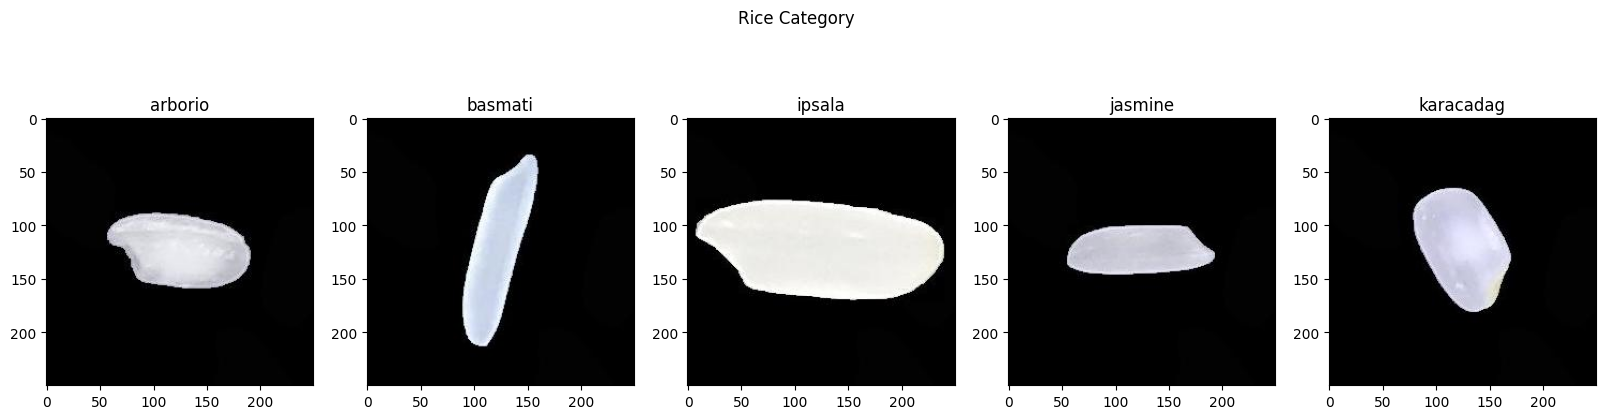

In [13]:
from PIL import Image

fig, ax = plt.subplots(ncols=5, figsize=(20, 5))
fig.suptitle('Rice Category')

# Load images using PIL for RGB format
arborio_image = np.array(Image.open(arborio[0]))
basmati_image = np.array(Image.open(basmati[0]))
ipsala_image = np.array(Image.open(ipsala[0]))
jasmine_image = np.array(Image.open(jasmine[0]))
karacadag_image = np.array(Image.open(karacadag[0]))

# Show images
ax[0].imshow(arborio_image)
ax[0].set_title('arborio')
#ax[0].axis('off')

ax[1].imshow(basmati_image)
ax[1].set_title('basmati')
#ax[1].axis('off')

ax[2].imshow(ipsala_image)
ax[2].set_title('ipsala')
#ax[2].axis('off')

ax[3].imshow(jasmine_image)
ax[3].set_title('jasmine')
#ax[3].axis('off')

ax[4].imshow(karacadag_image)
ax[4].set_title('karacadag')
#ax[4].axis('off')

plt.show()


In [14]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import tensorflow_hub as hub
mobile_net = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'  # MobileNetv2 link

mobile_net = hub.KerasLayer(
    mobile_net, input_shape=(224, 224, 3), trainable=False
)  # Removing the last layer

In [15]:
import numpy
import tensorflow as tf
import tensorflow_hub as hub

mobile_net = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
feature_extractor_layer = hub.KerasLayer(mobile_net, input_shape=(224, 224, 3), trainable=False)

print("Setup successful!")


Setup successful!


In [16]:
import tensorflow as tf
import tensorflow_hub as hub

print("TensorFlow version:", tf.__version__)
print("TensorFlow Hub version:", hub.__version__)


TensorFlow version: 2.19.0
TensorFlow Hub version: 0.16.1


In [17]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

class RiceClassifier(tf.keras.Model):
    def __init__(self, num_labels=5):
        super(RiceClassifier, self).__init__()
        self.feature_extractor = hub.KerasLayer(
            "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
            input_shape=(224, 224, 3),
            trainable=False,
            name="mobilenetv2_feature_extractor"
        )
        self.dropout = tf.keras.layers.Dropout(0.2)
        self.classifier = tf.keras.layers.Dense(num_labels, activation="softmax")

    def call(self, inputs, training=False):
        x = self.feature_extractor(inputs)
        x = self.dropout(x, training=training)
        return self.classifier(x)

# Instantiate model
model = RiceClassifier()

# 👇 Call the model with a dummy tensor to force build
dummy_input = tf.zeros((1, 224, 224, 3))
_ = model(dummy_input)

# Now summary will show actual parameter counts
model.summary()


Model: "rice_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (1, 5)                 │         6,405 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,405 (25.02 KB)

 Trainable params: 6,405 (25.02 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model. compile(
optimizer="adam",
loss=tf .keras. losses. SparseCategoricalCrossentropy(from_logits=True),
metrics=['acc' ])


In [19]:

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


Epoch 1/10


d:\anaconda\envs\rice_env\lib\site-packages\keras\src\backend\tensorflow\nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


71/71 ━━━━━━━━━━━━━━━━━━━━ 42s 545ms/step - acc: 0.6621 - loss: 0.9095 - val_acc: 0.9521 - val_loss: 0.2166
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 31s 434ms/step - acc: 0.9583 - loss: 0.1974 - val_acc: 0.9628 - val_loss: 0.1530
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 28s 390ms/step - acc: 0.9774 - loss: 0.1128 - val_acc: 0.9681 - val_loss: 0.1258
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 27s 374ms/step - acc: 0.9818 - loss: 0.0904 - val_acc: 0.9734 - val_loss: 0.1054
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 29s 404ms/step - acc: 0.9848 - loss: 0.0767 - val_acc: 0.9787 - val_loss: 0.1024
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 29s 405ms/step - acc: 0.9886 - loss: 0.0541 - val_acc: 0.9840 - val_loss: 0.0839
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 35s 500ms/step - acc: 0.9837 - loss: 0.0627 - val_acc: 0.9840 - val_loss: 0.0883
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 31s 431ms/step - acc: 0.9869 - loss: 0.0537 - val_acc: 0.9840 - val_loss: 0.0790
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 30s 428ms/step - acc:

In [20]:
model.evaluate(X_test,y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 324ms/step - acc: 0.9871 - loss: 0.0529


[0.05709543079137802, 0.9839857816696167]

In [21]:

from sklearn.metrics import classification_report
y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np. argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_bool))


9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 772ms/step
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       120
           1       0.99      0.99      0.99       114
           2       1.00      0.98      0.99       111
           3       0.99      1.00      0.99        99
           4       0.97      0.98      0.97       118

    accuracy                           0.98       562
   macro avg       0.98      0.98      0.98       562
weighted avg       0.98      0.98      0.98       562



In [22]:

from plotly.offline import iplot, init_notebook_mode
import plotly. express as px
import pandas as pd
init_notebook_mode(connected=True)
acc = pd.DataFrame( {'train' : history.history['acc' ], ' val' : history.history[ 'val_acc' ]})
fig = px.line(acc, x=acc.index, y=acc.columns[0 :: ], title='Training and Evaluation Accuracy every Epoch', markers=True)
fig.show()

In [23]:

loss = pd. DataFrame( {'train' : history.history['loss' ], 'val' : history.history['val_loss' ]})
fig = px. line(loss, x=loss.index, y=loss.columns[0 :: ], title='Training and Evaluation Loss every Epoch', markers=True)
fig. show()


In [24]:

a1 = cv2. imread(r"C:\Users\crb89\Desktop\Rice Type Detection\Data\basmati (2).jpg")
a1 = cv2.resize(a1,(224,224))
a1 = np.array(a1)
a1 = a1/255
a1 = np.expand_dims(a1, 0)
pred = model. predict(a1)
pred = pred. argmax()
pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


np.int64(1)

In [25]:

for i, j in df_labels.items():
    if pred == j:
        print(i)


basmati


In [29]:
model.export('rice_model')

INFO:tensorflow:Assets written to: rice_model\assets


INFO:tensorflow:Assets written to: rice_model\assets


Saved artifact at 'rice_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  2750115075120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2750051143520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2750092894352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2750092969936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2750092979792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2750092968000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2750051319328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2750051142288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2750051146336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2750092981728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2750092974512: TensorSpec(shape=(), dtype=tf.resou

In [36]:
import os
print("Model saved at:", os.path.abspath("rice1.h5"))


Model saved at: c:\Users\crb89\Desktop\Rice Type Detection\Training\rice1.h5
